In [1]:
import scipy
import librosa
import pickle
import numpy as np
from librosa import display
import matplotlib.pyplot as plt

In [2]:
def model_prediction(prediction):
    
    # Dictionary of possibe instrument predictions
	switch = {
		1: "Cello",
		2: "Clarinet",
		3: "Flute",
		4: "Guitar",
		5: "Saxophone",
		6: "Trumpet",
		7: "Violin",
	}
    
    # Return instrument or N/A if the input is not in the dictionary
	return(switch.get(prediction,"N/A"))


In [25]:
def instrument_prediction(predictions):
    unique,counts = np.unique(predictions,return_counts=True)
    index = np.argsort(counts)
    index = np.flip(index,0)
    unique = unique[index]
    counts = counts[index]
    
    for i in range(0,len(unique)):
        accuracy = (counts[i] / len(predictions)) * 100
        print("Instrument:",model_prediction(unique[i]),\
              ", Confidence = {:3.3f}".format(accuracy),"%")
        

In [26]:
# Load pickle model
modelname = "pickle_model.pkl"
with open(modelname, 'rb') as file:
    model = pickle.load(file)

In [27]:
sample_rate = 44100
n_fft = int(sample_rate/50)
hop = int(sample_rate/100)
mfcc_size = 14
top_db_limit = 35
filename = 'trumpet_As3_phrase_mezzo-forte_tenuto.wav'

588672


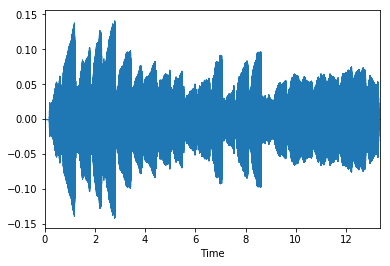

In [28]:
# Load and display audio data
data,sample_rate = librosa.load(filename,sr=sample_rate)
librosa.display.waveplot(data, sr=sample_rate)
print(len(data))

581632


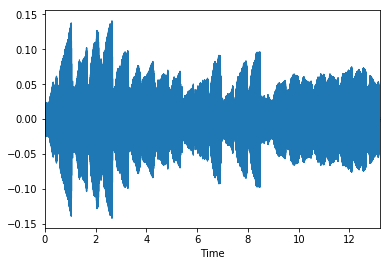

In [29]:
# Trim silence and display new audio data
data,index = librosa.effects.trim(data,top_db=top_db_limit)
librosa.display.waveplot(data, sr=sample_rate)
print(len(data))

In [30]:
onset_frames = librosa.onset.onset_detect(y=data,sr=sample_rate,\
                                          hop_length=hop)

notes = hop * onset_frames
print("Detected:",len(notes),"notes.")

Detected: 36 notes.


In [31]:
predictions = []
for i in range(0,len(notes)):
    
    if(i < len(notes)-1):
        note_data = data[notes[i]:notes[i+1]]
    else:
        note_data = data[notes[i]:-1]
        
    # Extract mfcc features and reshape numpy array for prediction
    mfcc = librosa.feature.mfcc(note_data,sr=sample_rate,\
                                n_fft=n_fft,\
                                hop_length=hop,\
                                n_mfcc=mfcc_size)

    mfcc = np.mean(mfcc[1:,:],axis=1)
    mfcc = np.reshape(mfcc,(1,-1))
    result = model.predict(mfcc)[0]
    predictions.append(result)

print("Prediction results with raw data:")
instrument_prediction(predictions) 

Prediction results with raw data:
Instrument: Trumpet , Confidence = 100.000 %


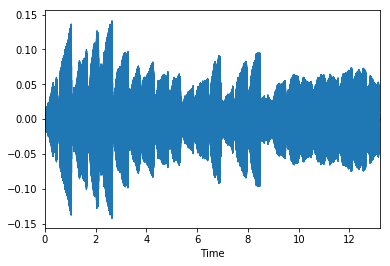

In [32]:
harmonic = librosa.effects.harmonic(data)
librosa.display.waveplot(harmonic, sr=sample_rate)

In [33]:
onset_frames_h = librosa.onset.onset_detect(y=harmonic,sr=sample_rate,\
                                            hop_length=hop)

notes_h = hop * onset_frames_h
print("Detected:",len(notes_h),"notes.")

Detected: 38 notes.


In [34]:
predictions_h = []
for i in range(0,len(notes_h)):
    
    if(i < len(notes_h)-1):
        note_data = harmonic[notes_h[i]:notes_h[i+1]]
    else:
        note_data = harmonic[notes_h[i]:-1]
        
    # Extract mfcc features and reshape numpy array for prediction
    mfcc = librosa.feature.mfcc(note_data,sr=sample_rate,\
                                n_fft=n_fft,\
                                hop_length=hop,\
                                n_mfcc=mfcc_size)

    mfcc = np.mean(mfcc[1:,:],axis=1)
    mfcc = np.reshape(mfcc,(1,-1))
    result = model.predict(mfcc)[0]
    predictions_h.append(result) 
    
print("Prediction results with harmonic component of data:")
instrument_prediction(predictions_h)

Prediction results with harmonic component of data:
Instrument: Trumpet , Confidence = 100.000 %


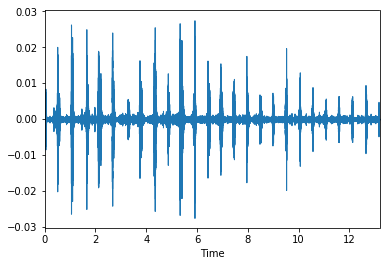

In [35]:
percussive = librosa.effects.percussive(data)
librosa.display.waveplot(percussive, sr=sample_rate)

In [36]:
onset_frames_p = librosa.onset.onset_detect(y=percussive,sr=sample_rate,\
                                            hop_length=hop)

notes_p = hop * onset_frames_p
print("Detected",len(notes_p),"notes.")

Detected 92 notes.


In [37]:
predictions_p = []
for i in range(0,len(notes_p)):
    
    if(i < len(notes_p)-1):
        note_data = percussive[notes_p[i]:notes_p[i+1]]
    else:
        note_data = percussive[notes_p[i]:-1]
    
    # Extract mfcc features and reshape numpy array for prediction
    mfcc = librosa.feature.mfcc(note_data,sr=sample_rate,\
                                n_fft=n_fft,\
                                hop_length=hop,\
                                n_mfcc=mfcc_size)

    mfcc = np.mean(mfcc[1:,:],axis=1)
    mfcc = np.reshape(mfcc,(1,-1))
    result = model.predict(mfcc)[0]
    predictions_p.append(result)  
    
print("Prediction results with percussive component of data:")
instrument_prediction(predictions_p)

Prediction results with percussive component of data:
Instrument: Trumpet , Confidence = 89.130 %
Instrument: Clarinet , Confidence = 6.522 %
Instrument: Saxophone , Confidence = 4.348 %


In [38]:
#%run -i "extract_features.py"

In [39]:
#%run -i "reference_svm"